In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import Callback,ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [39]:
data=pd.read_csv('data/17112001.csv')
data.head()

,642.0,359.0,97.4,351.3,33.9,33.1,47.6,130.5,134.6,12.0,...,3640.5,2605.1,101.1,16.0,67.8,67.7,51.1,13.5,2412.7,397.7
0,635.9,356.8,97.4,352.6,35.0,32.9,47.0,130.5,134.6,12.0,...,3647.4,2607.1,101.1,15.4,55.9,68.6,48.1,13.3,2412.7,397.8
1,638.8,356.0,97.4,353.4,33.9,34.0,47.4,130.5,134.6,12.0,...,3665.0,2556.3,101.1,15.3,70.8,66.8,49.0,13.4,2413.7,397.8
2,637.6,350.7,97.4,354.1,34.4,33.3,46.8,130.5,134.6,12.0,...,3651.3,2603.2,101.1,12.2,58.0,70.5,49.6,13.3,2413.7,397.8
3,635.7,360.4,97.4,354.3,33.7,33.3,47.4,130.5,134.6,12.0,...,3634.7,2609.0,101.0,13.0,69.3,68.7,50.5,13.4,2413.7,397.8
4,635.2,359.0,97.4,354.5,34.6,32.5,47.2,130.5,134.6,12.0,...,3636.6,2596.3,101.0,11.5,68.9,68.8,49.8,13.4,2411.7,397.8


# 2 class classification

In [40]:
class1f16_idx = np.concatenate([np.arange(56670,56770), np.arange(57475,57530), np.arange(57675,57800)])
class2f17_idx = np.concatenate([np.arange(53780,53794), np.arange(54193,54215)])
class3f18_idx = np.arange(54600,54700)
class4f19_idx = np.concatenate([np.arange(55482,55517), np.arange(55977,56015), np.arange(57030,57072), np.arange(58150,58325)])
class5n_idx = np.setdiff1d(np.arange(data.shape[0]), np.concatenate([class1f16_idx, class2f17_idx, class3f18_idx, class4f19_idx]))
y = np.zeros(data.shape[0])
y[class1f16_idx] = 0
y[class3f18_idx] = 1

f16=data.values[class1f16_idx]
f18=data.values[class3f18_idx]
data=np.asarray(np.concatenate([f16,f18]))

y=y[np.concatenate([class1f16_idx, class3f18_idx])]


In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=21)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


input_shape=x_train[0].shape

num_classes = np.unique(y).shape[0]
print(num_classes)
# Create the model
model = Sequential()
model.add(Dense(16, activation='elu', input_shape=input_shape))
model.add(Dense(8,activation='elu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()



# Define the optimizer and compile the model
import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=4, epochs=20, validation_data=(x_test, y_test))

2
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
67/67 [==============================] - 0s 3ms/step - loss: 0.1451 - accuracy: 0.9436 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2/20
67/67 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/20
67/67 [====================

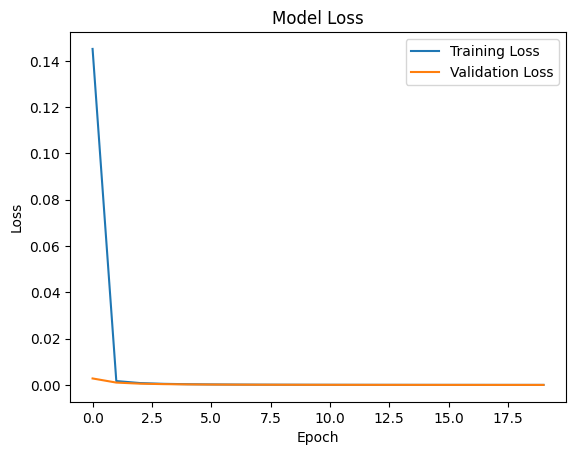

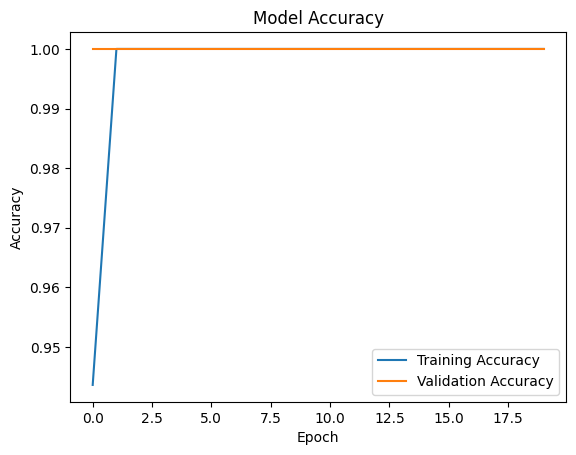

4/4 [==============================] - 0s 2ms/step - loss: 1.7520e-05 - accuracy: 1.0000
Test loss: 1.7519980247016065e-05
Test accuracy: 1.0


In [8]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Model Loss_mnist.pdf')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Model Accuracy_mnist.pdf')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


4/4 [==============================] - 0s 1ms/step
AUC: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        83
         1.0       1.00      1.00      1.00        31

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Confusion Matrix:


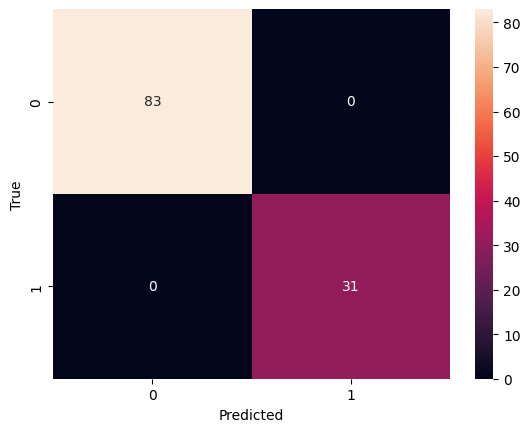

In [6]:
# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
# Compute evaluation metrics
auc = roc_auc_score(y_test, y_pred[:, 1])
report = classification_report(y_test, y_pred_classes)
confusion_mat = confusion_matrix(y_test, y_pred_classes)

print("AUC:", auc)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
sns.heatmap(confusion_mat, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

## with fft

In [ ]:
data_fft=np.fft.fftshift(data)
x_train, x_test, y_train, y_test = train_test_split(data_fft, y, test_size=0.3, random_state=21)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


input_shape=x_train[0].shape

num_classes = np.unique(y).shape[0]
print(num_classes)
# Create the model
model = Sequential()
model.add(Dense(16, activation='elu', input_shape=input_shape))
model.add(Dense(8,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()



# Define the optimizer and compile the model
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=8, epochs=50, validation_data=(x_test, y_test))

2
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 8)                 136       
                                                                 
 dense_55 (Dense)            (None, 2)                 18        
                                                                 
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
34/34 [==============================] - 1s 7ms/step - loss: 0.5410 - accuracy: 0.7368 - val_loss: 0.4742 - val_accuracy: 0.7281
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.7669 - val_loss: 0.3987 - val_accuracy: 0.7368
Epoch 3/50
34/34 [===================

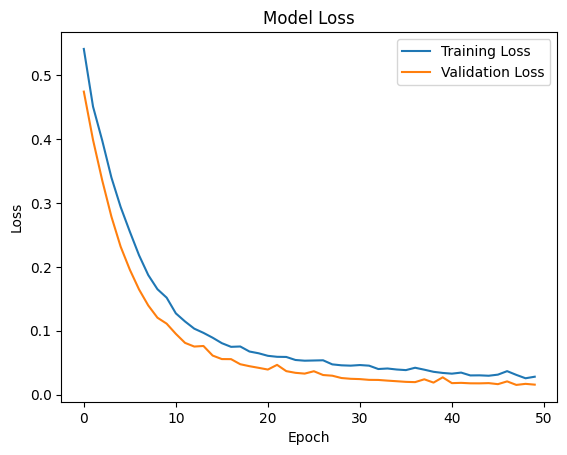

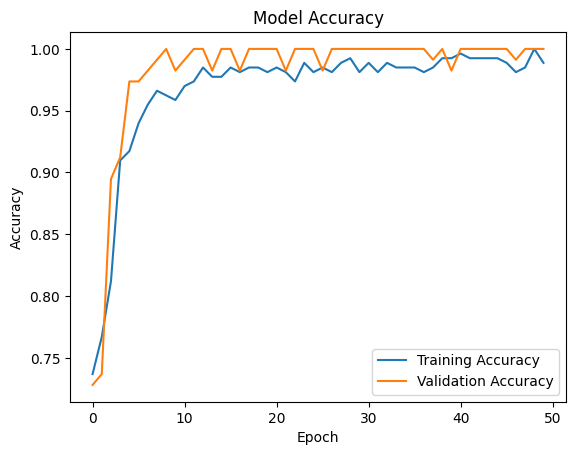

4/4 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.0000
Test loss: 0.015719350427389145
Test accuracy: 1.0


In [58]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Model Loss_mnist.pdf')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Model Accuracy_mnist.pdf')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


4/4 [==============================] - 0s 1ms/step
AUC: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        83
         1.0       1.00      1.00      1.00        31

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Confusion Matrix:


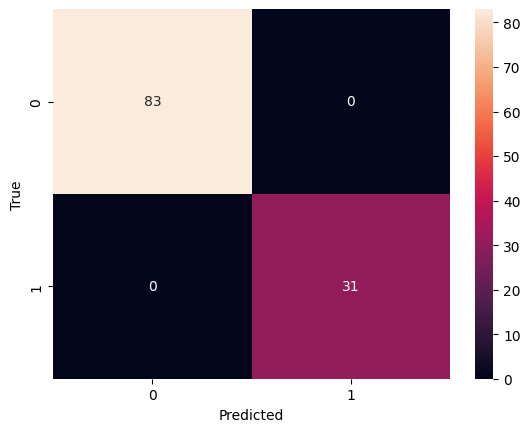

In [59]:
# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
# Compute evaluation metrics
auc = roc_auc_score(y_test, y_pred[:, 1])
report = classification_report(y_test, y_pred_classes)
confusion_mat = confusion_matrix(y_test, y_pred_classes)

print("AUC:", auc)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
sns.heatmap(confusion_mat, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

# 5 class classification

In [33]:
damadic= pd.read_csv('data/17112001.csv')
y_5class = np.zeros(damadic.shape[0])
y_5class[class1f16_idx] = 0
y_5class[class2f17_idx] = 1
y_5class[class3f18_idx] = 2
y_5class[class4f19_idx] = 3
y_5class[class5n_idx] = 4

damadic=np.asarray(damadic)

# y_5class=to_categorical(y_5class)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(damadic, y_5class, test_size=0.3, random_state=21)

print(x_train.shape)
print(y_train.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


input_shape=x_train[0].shape

num_classes = np.unique(y_5class).shape[0]
print(num_classes)


# Create the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=input_shape))
model.add(Dense(16,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.4, 
                              patience=5, 
                              min_lr=0.0001, verbose=1)

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = None,
                                        classes = np.unique(y_5class),
                                        y = y_5class                                                    
                                    )
class_weights = dict(zip(np.unique(y_5class), class_weights))

# Define the optimizer and compile the model
import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=64, epochs=100, validation_data=(x_test, y_test),callbacks=reduce_lr,class_weight=class_weights)

(60479, 32)
(60479,)
5
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,669
Trainable params: 1,669
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
945/945 [==============================] - 2s 1ms/step - loss: 0.0512 - accuracy: 0.9906 - val_loss: 0.0185 - val_accuracy: 0.9940 - lr: 0.0100
Epoch 2/100
945/945 [==============================] - 1s 1ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0158 - val_accuracy: 0

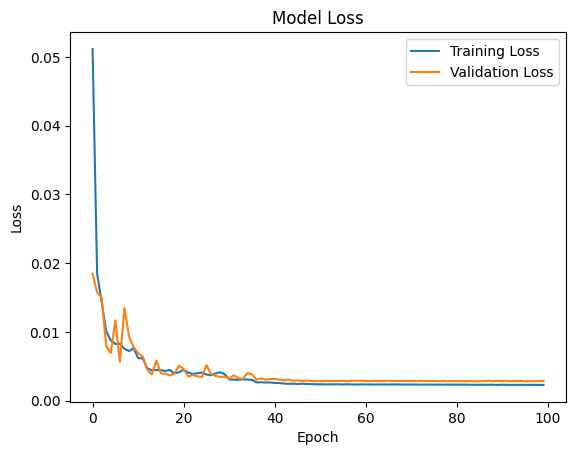

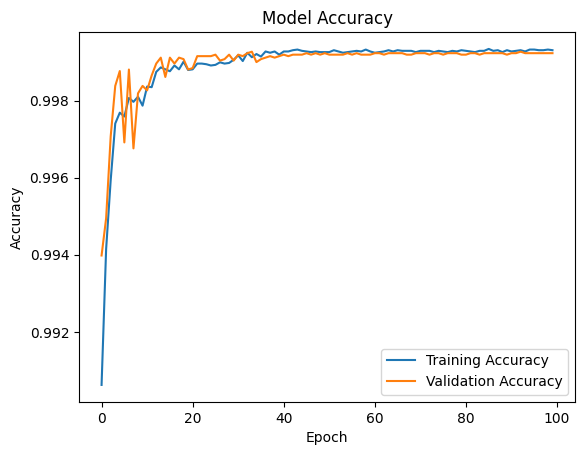

810/810 [==============================] - 1s 699us/step - loss: 0.0029 - accuracy: 0.9992
Test loss: 0.0028740153647959232
Test accuracy: 0.9992284178733826


In [20]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Model Loss_mnist.pdf')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Model Accuracy_mnist.pdf')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


810/810 [==============================] - 0s 579us/step
Test AUC: 0.999686370904335
Recall: 0.9992283950617284
F1 Score: 0.9992194778515102
Precision: 0.9992258959319531
Confusion Matrix:


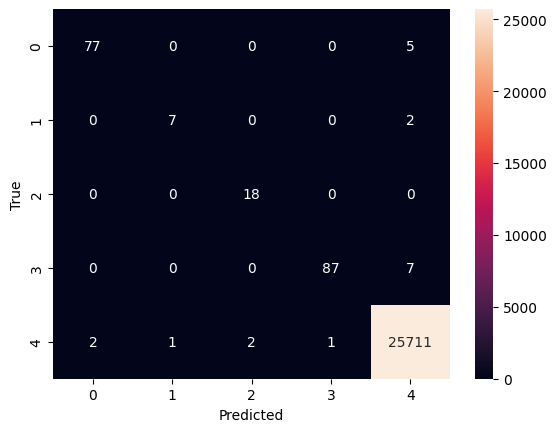

In [22]:
# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_classes)

# Compute test AUC
y_pred_prob = model.predict(x_test)
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Compute recall, F1 score, and precision
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')

# Print the metrics

print("Test AUC:", auc)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)
print("Confusion Matrix:")
sns.heatmap(confusion_mat, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

## with fft

In [63]:
damadic_fft=np.fft.fftshift(damadic)
x_train, x_test, y_train, y_test = train_test_split(damadic_fft, y_5class, test_size=0.3, random_state=21)

print(x_train.shape)
print(y_train.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


input_shape=x_train[0].shape

num_classes = np.unique(y_5class).shape[0]
print(num_classes)


# Create the model
model = Sequential()
model.add(Dense(32, activation='elu', input_shape=input_shape))
model.add(Dense(16,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.4, 
                              patience=5, 
                              min_lr=0.00001, verbose=1)

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = None,
                                        classes = np.unique(y_5class),
                                        y = y_5class                                                    
                                    )
class_weights = dict(zip(np.unique(y_5class), class_weights))

# Define the optimizer and compile the model
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=128, epochs=90, validation_data=(x_test, y_test),callbacks=reduce_lr,class_weight=class_weights)

(60479, 32)
(60479,)
5
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 32)                1056      
                                                                 
 dense_60 (Dense)            (None, 16)                528       
                                                                 
 dense_61 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,669
Trainable params: 1,669
Non-trainable params: 0
_________________________________________________________________
Epoch 1/90
473/473 [==============================] - 1s 2ms/step - loss: 0.1759 - accuracy: 0.9586 - val_loss: 0.0560 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 2/90
473/473 [==============================] - 1s 1ms/step - loss: 0.0570 - accuracy: 0.9917 - val_loss: 0.0501 - val_accuracy: 0.

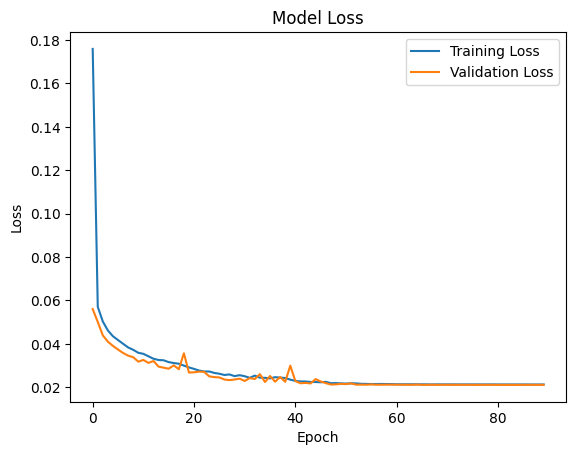

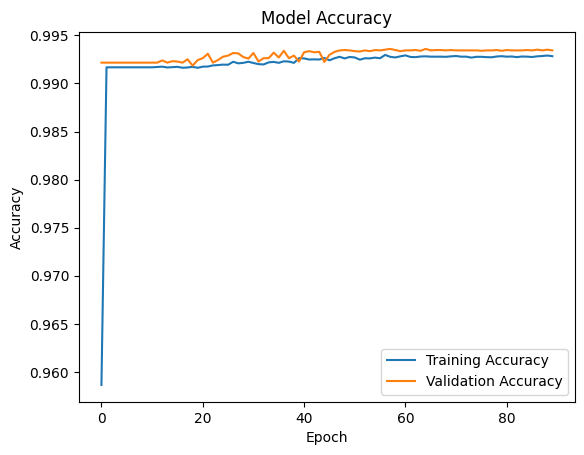

810/810 [==============================] - 1s 872us/step - loss: 0.0211 - accuracy: 0.9934
Test loss: 0.021118594333529472
Test accuracy: 0.9934413433074951


In [64]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Model Loss_mnist.pdf')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Model Accuracy_mnist.pdf')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


810/810 [==============================] - 0s 585us/step
Test AUC: 0.9919580262069696
Recall: 0.9934413580246914
F1 Score: 0.9919256554147458
Precision: 0.9916343460497967
Confusion Matrix:


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


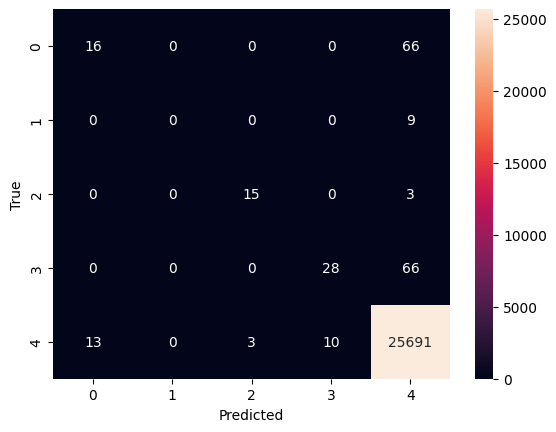

In [65]:
# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_classes)

# Compute test AUC
y_pred_prob = model.predict(x_test)
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Compute recall, F1 score, and precision
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')

# Print the metrics

print("Test AUC:", auc)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)
print("Confusion Matrix:")
sns.heatmap(confusion_mat, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()